In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
###Balance Data

In [8]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [14]:
###Exploratory Data Analysis

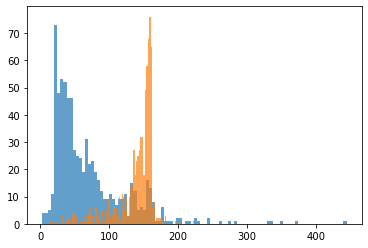

In [15]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)
plt.show()

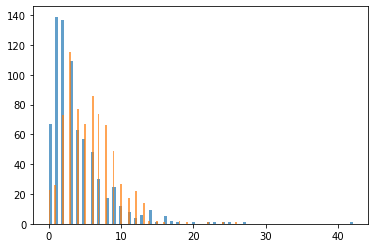

In [16]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [17]:
###Data Preparation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
data.head()

,label,message,length,punct
0,ham,Siva is in hostel aha:-.,24,3
1,ham,Oh ho. Is this the first time u use these type...,55,1
2,ham,Shall i come to get pickle,26,0
3,ham,Thanks chikku..:-) gud nyt:-*,29,8
4,ham,Its good to hear from you,25,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state= 0, shuffle= True, stratify=data['label'])


In [22]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

In [23]:
###Bag of Word Creation

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
x_train = vectorizer.fit_transform(x_train)

In [26]:
x_train.shape

(1045, 3627)

In [27]:
x_train

<1045x3627 sparse matrix of type '<class 'numpy.float64'>'
	with 17651 stored elements in Compressed Sparse Row format>

In [28]:
###Pipeline and RF

In [29]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [32]:
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [34]:
y_pred = clf.predict(x_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 26, 198]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [37]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [38]:
clf.predict(["Hi, this is Priyanka"])

array(['ham'], dtype=object)

In [39]:
clf.predict(["Congratulations, you have won a free tickets to USA"])

array(['spam'], dtype=object)